# Advanced Lane Line Finding Project


## Camera Calibration

In [16]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

class Camera(object):
    def __init__(self, corners=(9,6)):
        self._corners = corners
        self._mtx = []
        self._dist = []
    
    def calibrate(self, path='./camera_cal'):
        objp = np.zeros((self._corners[0] * self._corners[1],3), np.float32)
        objp[:,:2] = np.mgrid[0:self._corners[0],0:self._corners[1]].T.reshape(-1,2)
        
        objpoints = []
        imgpoints = []
        
        image_names = glob.glob(path + '/*.jpg')
        
        for img_n in image_names:
            img = cv2.imread(img_n)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            ret, img_corners = cv2.findChessboardCorners(gray, self._corners, None)
            
            if ret == True:
                objpoints.append(objp)
                imgpoints.append(img_corners)
            else:
                print('Could not find corners for %s' % img_n)
        
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
                    
        self._mtx = mtx
        self._dist = dist
    
    def undistort(self, image):
        h, w = image.shape[:2]
        newcameramtx, roi=cv2.getOptimalNewCameraMatrix(self._mtx, self._dist, (w,h), 1, (w,h))
        dst = cv2.undistort(image, self._mtx, self._dist, None, newcameramtx)
        
        x,y,w,h = roi
        cropped_dst = dst[y:y+h, x:x+w]
        
        return cropped_dst
    
camera = Camera()
camera.calibrate()

Could not find corners for ./camera_cal\calibration1.jpg
Could not find corners for ./camera_cal\calibration4.jpg
Could not find corners for ./camera_cal\calibration5.jpg


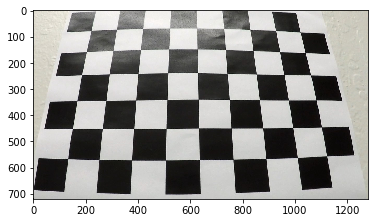

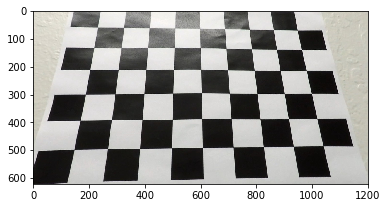

In [24]:
cal_image = plt.imread('./camera_cal/calibration3.jpg')
plt.imshow(cal_image)
plt.show()
plt.imshow(camera.undistort(cal_image))
plt.show()

##Image transformation

In [125]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class ImageTransformer(object):
    def __init__(self):
        self.init_transform()

    def init_transform(self, x=[295, 593, 695, 1004], y=[653, 454], x_scale=2):
        x_center = np.mean(x)
        xs = [x_center - (x_center - x[0]) * x_scale,
              x_center - (x_center - x[1]) * x_scale,
              x_center + (x[2] - x_center) * x_scale,
              x_center + (x[3] - x_center) * x_scale]
        xi = [int(x) for x in xs]
        
        src = np.float32([[xi[0],y[0]], [xi[1],y[1]], [xi[2],y[1]], [xi[3],y[0]]])
        dst = np.float32([[0,600], [0,0], [600,0], [600,600]])
        self._M = cv2.getPerspectiveTransform(src, dst)

    def _warp(self, image):    
        warped = cv2.warpPerspective(image, self._M, (600,600), flags=cv2.INTER_LINEAR)
        return warped
    
    def transform(self, image):
        img_warp = self._warp(image)
        return img_warp
    
img_tf = ImageTransformer()

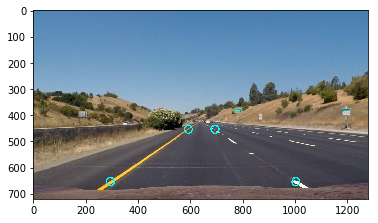

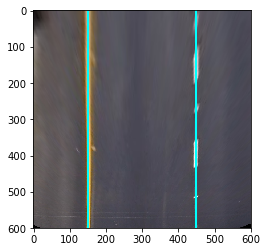

In [127]:
test_image = plt.imread('./test_images/straight_lines1.jpg')
img_transform = img_tf.transform(test_image)

for p in [(295,653), (593,454), (695, 454), (1004, 653)]:
    cv2.circle(test_image, p, 15, color=(0, 255, 255), thickness=3)
plt.imshow(test_image)
plt.show()

cv2.line(img_transform, (150,600), (150,0), color=(0, 255, 255), thickness=3)
cv2.line(img_transform, (448,600), (448,0), color=(0, 255, 255), thickness=3)
plt.imshow(img_transform)
plt.show()

# Image preprocessing

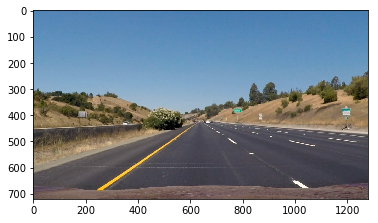

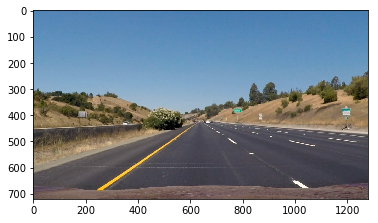

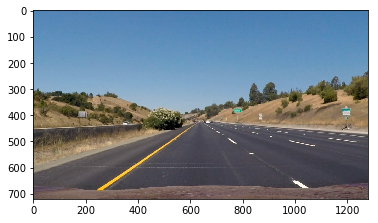

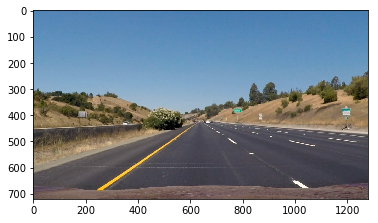

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

class ImagePreprocessor(object):
    def __init__(self):
        self._image_pipeline = []
    
    def _colorspace(self, image):
        return np.copy(image)
    
    def _filter(self, image):
        return np.copy(image)
    
    def _gradients(self, image):
        return np.copy(image)
    
    def _apply(self, function):
        self._image_pipeline.append(function(self._image_pipeline[-1]))
    
    def process(self, image):
        self._image_pipeline = [image]
        self._apply(self._filter)
        self._apply(self._gradients)
        self._apply(self._colorspace)
        return self._image_pipeline[-1]
        
    def show_pipeline(self):
        for img in self._image_pipeline:
            plt.imshow(img)
            plt.show()

img_pp = ImagePreprocessor()

cal_image = plt.imread('./test_images/straight_lines1.jpg')
img_pp.process(cal_image)
img_pp.show_pipeline()